<a href="https://colab.research.google.com/github/AishaLichtner/projects-2019/blob/master/Bicicletas_2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive



In [110]:
#access drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#VARIABLES
year_one = '2014'
year_two = '2016'
N = 10
path = "/content/drive/My Drive/data/"




#Load data

In [ ]:
def load_data(path, year):

  data= pd.read_csv( path + year + ".csv", sep = ',', encoding="utf-8-sig")
  #remove incomplete lines
  data.dropna()
  return data

In [115]:
def create_trips_column(data):
  trips =data.start_station_code.apply(str) +'-'+ data.end_station_code.apply(str)
  data['trip_code'] = trips
  return data

In [112]:
  #load station condition data  
  station_cond = pd.read_json(path+"stations.json")


In [111]:

#Create dict for station names
station_dict = pd.Series(stations.name.values,index=stations.code).to_dict()

#Histogram of travel times

In [120]:
def plot_hist(data):
  duration = data["duration_sec"]

  n, bins, patches = plt.hist(x=duration, bins='auto', color='#0500aa',
                            alpha=0.85, rwidth=0.85)
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('Travel Time in seconds')
  plt.ylabel('Frequency')
  plt.title('Travel Times')
  plt.text(23, 45, r'$\mu=15, b=3$')
  maxfreq =n.max()
  # Set a clean upper y-axis limit.
  plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
  plt.xlim(right = duration.max())


In [142]:
#funtion to determine N most used start stations
def most_used_station_start(data,N):
 return    data.start_station_code.value_counts()[:N].index.tolist()

In [141]:
#funtion to determine N most used end stations
def most_used_station_end(data,N):
  return data.end_station_code.value_counts()[:N].index.tolist()

In [136]:
def most_used_station_gen(data, N):
  #Concatinate Colums of start and end stations
  all_stat = pd.concat([data.start_station_code, data.end_station_code])
  return all_stat.value_counts()[:N].index.tolist()


In [137]:
def map_trip(trip_codes):
  df= pd.DataFrame()
  df["trip codes"] = trip_codes
  df[" trips"] = [station_dict[int(x.split('-')[0])]+' -> '+ station_dict[int(x.split('-')[0])] for x  in trip_codes]
  df.style.set_caption(str(N) +" Most FRequent Trips")
  return df
 #return pd.DataFrame(trip_codes,[station_dict[int(x.split('-')[0])]+' -> '+ station_dict[int(x.split('-')[0])] for x  in trip_codes])


In [138]:
def map_station(station_code_list):
  return pd.DataFrame([station_dict[x] for x in station_code_list ])
  

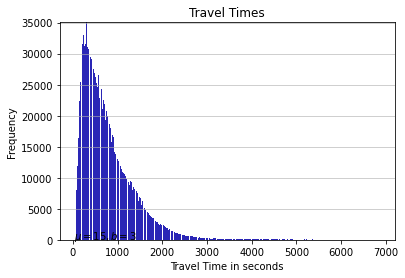

In [127]:

#load data for year
stations = load_data(path+"Stations_", year_one)
data = load_data(path+"OD_", year_one)
data=create_trips_column(data)
plot_hist(data)




Most used start stations

In [139]:
map_station(most_used_station_start(data,N))

,0
0,Métro Mont-Royal (Rivard / du Mont-Royal)
1,de Maisonneuve / de Bleury
2,de Maisonneuve / Stanley
3,Métro St-Laurent (de Maisonneuve / St-Laurent)
4,Berri / de Maisonneuve
5,St-Urbain / René-Lévesque
6,Mackay /de Maisonneuve (Sud)
7,Square Victoria
8,Métro Place-d'Armes (Viger / St-Urbain)
9,Ste-Catherine / St-Hubert


Most used end stations

In [143]:
map_station(most_used_station_end(data,N))

,0
0,Métro Mont-Royal (Rivard / du Mont-Royal)
1,de Maisonneuve / de Bleury
2,de Maisonneuve / Stanley
3,Métro St-Laurent (de Maisonneuve / St-Laurent)
4,Berri / de Maisonneuve
5,St-Urbain / René-Lévesque
6,Mackay /de Maisonneuve (Sud)
7,Square Victoria
8,Métro Place-d'Armes (Viger / St-Urbain)
9,Ste-Catherine / St-Hubert


Most used stations general



In [145]:
map_station(most_used_station_gen(data,N))

,0
0,Métro Mont-Royal (Rivard / du Mont-Royal)
1,de Maisonneuve / de Bleury
2,de Maisonneuve / Stanley
3,Métro St-Laurent (de Maisonneuve / St-Laurent)
4,Mackay /de Maisonneuve (Sud)
5,Berri / de Maisonneuve
6,Square St-Louis
7,St-Urbain / René-Lévesque
8,du Mont-Royal / Clark
9,Roy / St-Laurent


# N Top Trips


In [147]:
#most frequent trips 
map_trip(data.trip_code.value_counts()[:N].index.tolist())

,trip codes,trips
0,6501-6501,Métro Jean-Drapeau -> Métro Jean-Drapeau
1,6026-6026,de la Commune / Place Jacques-Cartier -> de la...
2,6155-6184,Garnier / du Mont-Royal -> Garnier / du Mont-R...
3,6154-6184,Marquette / du Mont-Royal -> Marquette / du Mo...
4,6064-6100,de Maisonneuve / Stanley -> de Maisonneuve / S...
5,6396-6398,Métro Pie-IX (Pierre-de-Coubertin / Pie-IX) ->...
6,6184-6155,Métro Mont-Royal (Rivard / du Mont-Royal) -> M...
7,6184-6154,Métro Mont-Royal (Rivard / du Mont-Royal) -> M...
8,6064-6194,de Maisonneuve / Stanley -> de Maisonneuve / S...
9,6100-6064,Mackay /de Maisonneuve (Sud) -> Mackay /de Mai...


#Find rush hour

In [ ]:
def seperate_date(dates):
  
  #datetime.datetime.strptime(dates ,'%Y-%M-%D %H:%M')
  #time = dates.hour

     date = []
     time = [] 
  
     for x in dates:
       date.append(x.split(' ')[0])
       time.append(datetime.datetime.strptime((x.split(' ')[1]), '%H:%M'))

     return date,time




In [149]:
#seperate time stamp and add new colums date and hour

data["start_date"] = pd.to_datetime(data.start_date)
data["start_hour"]= data.start_date.dt.hour


Times when  most bikes are rented

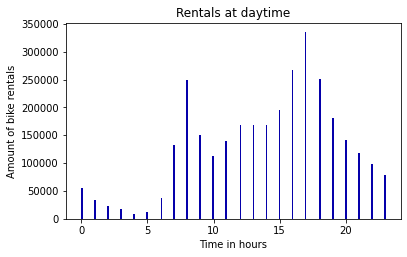

In [150]:
# beautify the x-labels
plt.gcf().autofmt_xdate()

n, bins, patches = plt.hist(x=data.start_hour, bins='auto', color='#0500aa')
#plt.grid(axis='y', alpha=0.75)


plt.xlabel('Time in hours')
plt.ylabel('Amount of bike rentals')
plt.title('Rentals at daytime')
plt.show()

maxfreq =n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
#plt.xlim(right = data.start_time.max())


We can observe that at 8 am and 6 pm the most bikes are rented, that means the rush hours are at 8am and 6 pm.


# Compare Usage between 2 years


In [ ]:
def travels_per_station(data):
  return pd.DataFrame(data["start_station_code"].value_counts())
  


In [ ]:
def convert_station_con_to_DF():
  stat = pd.DataFrame(station_cond.stations)
  print(stat)
  stat= pd.DataFrame.from_dict(stat)
  stat = pd.DataFrame.from_records(stat)
  return stat

In [ ]:
station_cond

In [ ]:
stat_con_df = convert_station_con_to_DF()

In [ ]:
stat_con_df 

In [ ]:
amount_bikes_in_Station(6240)

In [ ]:
def amount_bikes_in_Station(station_code):
  bikes = 0
  bikes = stat_con_df.loc[stat_con_df['id'] == station_code]['ba']
  return bikes
 

In [ ]:
def total_amount_bikes(stations):
  total=0
  for x in stations:
   total= total+ amount_bikes_in_Station(x['station_code'])



In [ ]:
def travels_stat_bike(data_one, data_two,station_one, station_two year_one, year_two):

  ratio_one= data_one.size/station_one.size
  ratio_two = data_two.size/station_two.size

In [ ]:
def run_compare( year_one, year_two):
  #data loading
  data_one = load_data( path+"OD_", year_one)
  data_two = load_data(path_data+"OD_" , year_two)
  stations_one= load_data( path+"Stations_", year_one)
  stations_two= load_data( path+"Stations_", year_two)
  #comparing
  total_travels_comp(data_one, data_two, year_one, year_two)
  total_usage_comp(data_one, data_two, year_one, year_two)


  travels_pre_stat_one = travels_per_station(data_one)
  travel_per_stat_two  = travels_per_station(data_two)

  



In [ ]:
def total_travels_comp(data_one, data_two, year_one, year_two):
  total_travels_one = data_one.size
  total_travels_two = data_two.size

  #plot results
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.set_ylabel('Total Travels in Millions')
  ax.set_title('Total Travels per Year')
  langs = [year_one, year_two]
  travels = [total_travels_one,total_travels_two]
  ax.bar(langs,travels)
  plt.show()





In [ ]:
def total_usage_comp(data_one, data_two, year_one, year_two):
    total_usage_one = data_one["duration_sec"].sum()
    total_usage_two = data_two["duration_sec"].sum()
    print(total_usage_one)
     #plot results
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_ylabel('Seconds')
    ax.set_title('Total Usage in Seconds per Year')
    langs = [year_one, year_two]
    travels = [total_usage_one,total_usage_two]
    ax.bar(langs,travels)
    plt.show()



In [ ]:
run_compare('2014','2016')